## Análisis descriptivo de los datos

In [19]:
import pandas as pd

data = pd.read_excel('DataBase.xlsx')
etiq_verd=data[['Etiq']]
data=data[['Temperatura','Consumo_Lavanderia', 'Consumo_Cocina', 
           'Resto_Consumo','Habitantes']]

# Análisis descriptivo
descripcion = data.describe()

# Imprimir el análisis descriptivo
print(descripcion)

# Guardar el análisis en un archivo Excel
descripcion.to_excel('analisis_descriptivo.xlsx')

       Temperatura  Consumo_Lavanderia  Consumo_Cocina  Resto_Consumo  \
count  1069.000000         1069.000000     1069.000000    1069.000000   
mean     13.257250          183.285033      717.735267    1608.285688   
std       8.195113           50.887971      128.585246     146.875020   
min      -8.000000           52.000000      391.100000    1320.000000   
25%       7.000000          149.000000      626.400000    1471.250000   
50%      12.000000          177.000000      698.400000    1621.500000   
75%      18.000000          214.100000      786.200000    1713.000000   
max      35.000000          576.000000     1777.000000    1981.750000   

        Habitantes  
count  1069.000000  
mean     55.075772  
std       2.692906  
min      47.000000  
25%      54.000000  
50%      55.000000  
75%      56.000000  
max      63.000000  


## Normalización de los datos

In [11]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data_normalized = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)
#data_train, data_test = train_test_split(data, test_size=0.2, random_state=51)
#scaler = MinMaxScaler()
#data = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)
#data_train, data_test = train_test_split(data, test_size=0.2, random_state=51)

## Histogramas de las variables

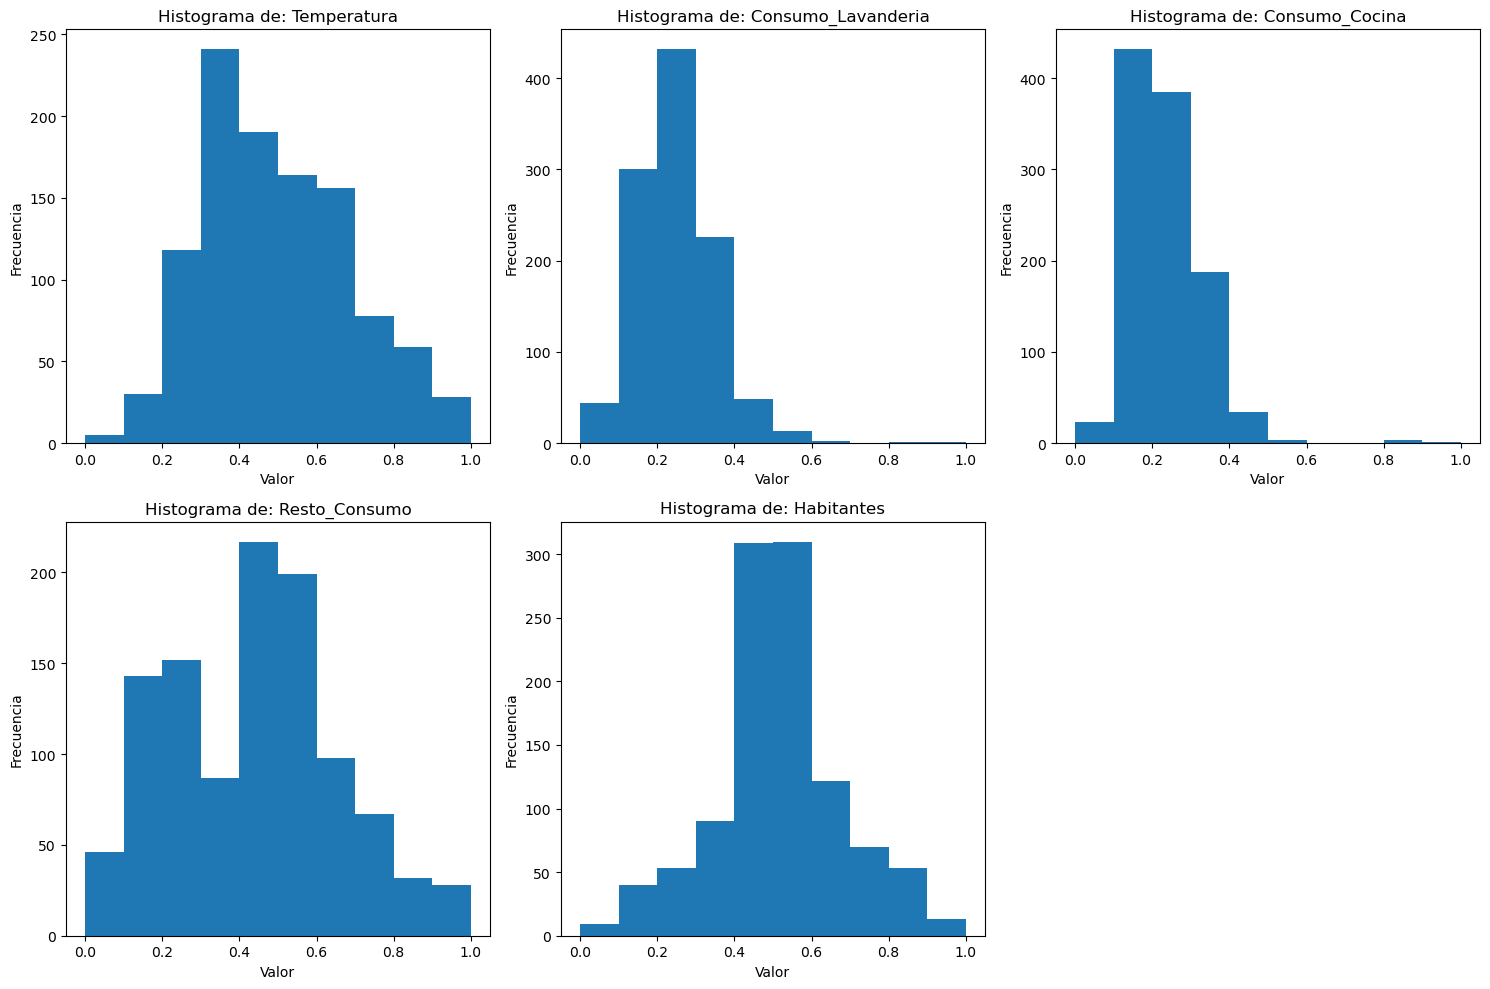

In [12]:
import matplotlib.pyplot as plt

for column in data_normalized.columns:
    #plt.figure()
    data_normalized[column].hist()
    plt.close()

# Número de columnas para los histogramas
num_columns = len(data_normalized.columns)
num_rows = num_columns // 3 + (num_columns % 3 > 0)  # Asegurar que haya suficientes filas

# Crear una figura con subplots
fig, axs = plt.subplots(num_rows, 3, figsize=(15, num_rows * 5))  # Ajustar el tamaño según sea necesario

# Aplanar el arreglo de ejes para facilitar su manejo
axs = axs.flatten()

# Crear un histograma para cada columna normalizada
for i, column in enumerate(data_normalized.columns):
    axs[i].hist(data_normalized[column])
    axs[i].set_title(f'Histograma de: {column}')
    axs[i].set_xlabel('Valor')
    axs[i].set_ylabel('Frecuencia')

# Ocultar los ejes adicionales si los hay
for ax in axs[num_columns:]:
    ax.set_visible(False)

# Ajustar el layout y mostrar la figura
plt.tight_layout()
plt.show()

## Matriz de correlación

In [16]:
matriz_corr=df.corr(method='spearman') #Coeficiente de Spearman
print(matriz_corr)

                    Temperatura  Consumo_Lavanderia  Consumo_Cocina  \
Temperatura            1.000000           -0.091294       -0.254964   
Consumo_Lavanderia    -0.091294            1.000000       -0.308547   
Consumo_Cocina        -0.254964           -0.308547        1.000000   
Resto_Consumo          0.007749           -0.041875        0.112871   
Habitantes            -0.177964           -0.278193        0.169495   
Etiq                  -0.023468            0.175978        0.169981   
Indice                 0.305945            0.321807       -0.709896   

                    Resto_Consumo  Habitantes      Etiq    Indice  
Temperatura              0.007749   -0.177964 -0.023468  0.305945  
Consumo_Lavanderia      -0.041875   -0.278193  0.175978  0.321807  
Consumo_Cocina           0.112871    0.169495  0.169981 -0.709896  
Resto_Consumo            1.000000    0.217349 -0.012624 -0.131303  
Habitantes               0.217349    1.000000  0.040676 -0.290127  
Etiq                   

### Mapa de calor de la matriz de correlación

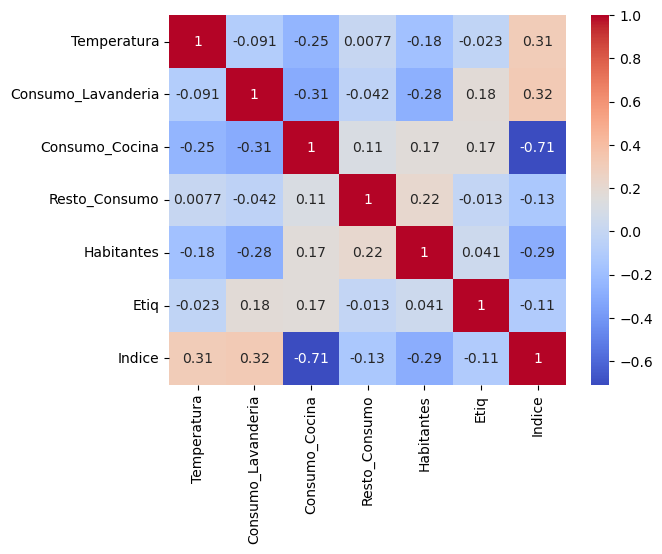

In [18]:
import seaborn as sns
# Crear mapa de calor
mapa_calor = sns.heatmap(matriz_corr, 
                        annot=True,  # Anotar valores en las celdas
                        cmap="coolwarm")  # Paleta de colores (personalizable)
plt.show()

## División de los datos en data_train y data_val

In [34]:
from sklearn.model_selection import train_test_split
import numpy as np

data=data_normalized
data['Etiq'] = etiq_verd['Etiq']
print(data.head())
data_train, data_test = train_test_split(data, test_size=0.2, random_state=51)
#print(data_train.head())
#print(data_test.head())
print('\n ------------------------ Datos de entrenamiento ------------------------------ \n')
print(data_train.head())
print('\n ------------------------ Datos de validación ---------------------------------- \n')
print(data_test.head()) 

index_data_train=data_train.index
index_data_test=data_test.index

# Guardar los datos en archivos excel
data_train.to_excel('Datos_train.xlsx')
data_test.to_excel('Datos_test.xlsx')

data_train=np.array(data_train) 
data_test=np.array(data_test) 

Anom_reales=[2,   3,   4 ,  5 , 24,  27, 152, 209, 217, 221, 222, 228, 247, 
             248, 252, 254, 299, 300, 530, 612 ,613, 618, 660, 662,666, 681, 709, 713]

anom_data_train= np.intersect1d(index_data_train, Anom_reales)
anom_data_test= np.intersect1d(index_data_test, Anom_reales)
print('\n -------------------------------------------------------------------------------\n ')
print("\n Cantidad de anomalías en data_train:",len(anom_data_train))
print(anom_data_train)
print("\n Cantidad de anomalías en data_test:",len(anom_data_test))
print(anom_data_test)

   Temperatura  Consumo_Lavanderia  Consumo_Cocina  Resto_Consumo  Habitantes  \
0     0.534884            0.280534        0.357096       0.081980      0.6875   
1     0.581395            0.391221        0.350602       0.615791      0.6875   
2     0.511628            0.512023        0.351324       0.612769      0.6875   
3     0.581395            1.000000        1.000000       0.618814      0.6875   
4     0.651163            0.631679        0.361426       0.684549      0.6875   

   Etiq  
0     0  
1     0  
2     1  
3     1  
4     1  

 ------------------------ Datos de entrenamiento ------------------------------ 

     Temperatura  Consumo_Lavanderia  Consumo_Cocina  Resto_Consumo  \
518     0.395349            0.246374        0.331337       0.111447   
601     0.395349            0.198473        0.273396       0.490744   
602     0.139535            0.167176        0.252471       0.490744   
968     0.418605            0.317557        0.151627       0.576502   
325     0.65116